In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['axes.unicode_minus'] = False # " - " 기호 Unicode 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

In [2]:
np.random.seed(42)

df = pd.DataFrame(np.random.randn(1000, 4), index=pd.date_range('1/1/2021', periods=1000), columns=list('ABCD'))
df

,A,B,C,D
2021-01-01,0.496714,-0.138264,0.647689,1.523030
2021-01-02,-0.234153,-0.234137,1.579213,0.767435
2021-01-03,-0.469474,0.542560,-0.463418,-0.465730
2021-01-04,0.241962,-1.913280,-1.724918,-0.562288
2021-01-05,-1.012831,0.314247,-0.908024,-1.412304
...,...,...,...,...
2023-09-23,1.362563,1.640615,3.152057,-1.123494
2023-09-24,0.242882,-2.082099,0.553149,-0.548200
2023-09-25,1.923446,-0.774615,-1.689183,-0.471264
2023-09-26,-1.975488,0.751099,-2.065083,0.028458


### 1) 기본 막대 차트
- 2021-01-05 날짜로 차트 작성

<AxesSubplot:>

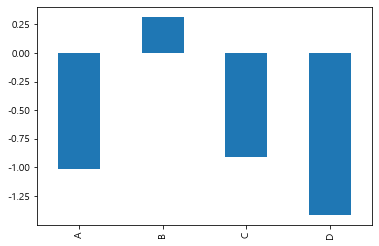

In [6]:
df.loc['2021-01-05'].plot.bar()

<AxesSubplot:>

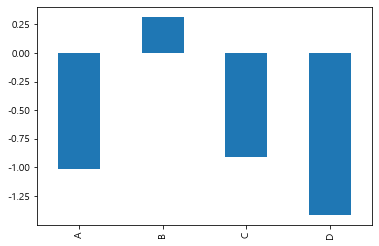

In [5]:
df.iloc[4].plot(kind='bar')

#### 2) 가로 축 선 생성

<AxesSubplot:>

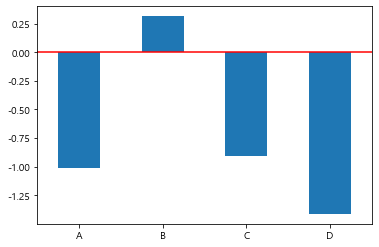

In [7]:
plt.axhline(0, color='r')
df.iloc[4].plot.bar(rot=0)

<AxesSubplot:>

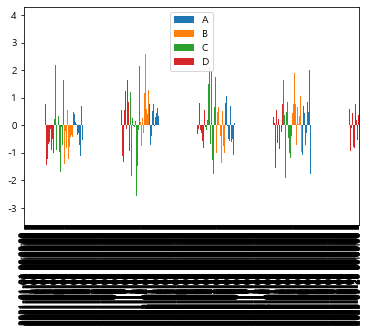

In [8]:
df.plot.bar()

#### 누적막대

<AxesSubplot:>

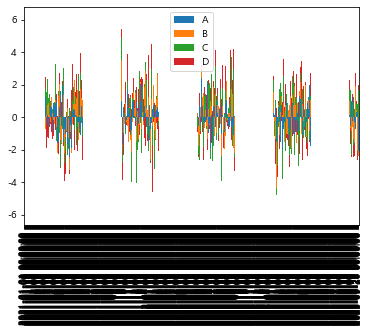

In [9]:
df.plot.bar(stacked = True)

#### 수평막대

<AxesSubplot:>

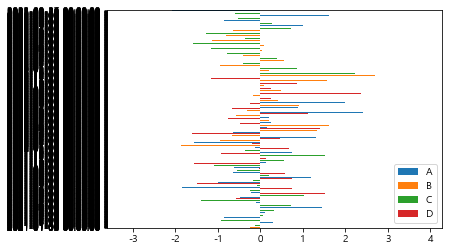

In [10]:
df.plot.barh()

<AxesSubplot:>

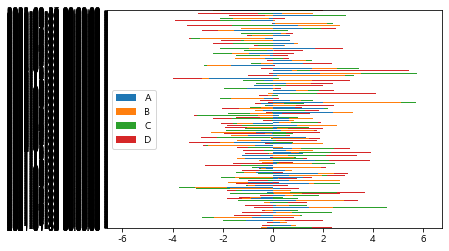

In [11]:
df.plot.barh(stacked=True)

In [12]:
df = pd.DataFrame({
    'data1' : [2,3,5,4,3,2,5,5],
    'data2' : [4,6,7,5,6,3,8,5],
    'group' : ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
    'sector' : ['ha', 'ha', 'ho', 'ho', 'ha', 'ha', 'ho', 'ho']
})
df

,data1,data2,group,sector
0,2,4,a,ha
1,3,6,a,ha
2,5,7,a,ho
3,4,5,a,ho
4,3,6,b,ha
5,2,3,b,ha
6,5,8,b,ho
7,5,5,b,ho


#### 인덱스 설정 : group, sector

In [14]:
df = df.set_index(['group', 'sector'])
df

data1  data2
group sector              
a     ha          2      4
      ha          3      6
      ho          5      7
      ho          4      5
b     ha          3      6
      ha          2      3
      ho          5      8
      ho          5      5

#### group, sector 인덱스를 이용해서 groupby 연산 후 mean 적용

In [17]:
avg_df = df.groupby(['group', 'sector']).mean()
avg_df

data1  data2
group sector              
a     ha        2.5    5.0
      ho        4.5    6.0
b     ha        2.5    4.5
      ho        5.0    6.5

#### 표준편차 구하기 : errors 변수에 담기 ( df.groupby(['group', 'sector']) )

In [19]:
errors = df.groupby(['group', 'sector']).std()
errors

data1     data2
group sector                    
a     ha      0.707107  1.414214
      ho      0.707107  1.414214
b     ha      0.707107  2.121320
      ho      0.000000  2.121320

<AxesSubplot:xlabel='group,sector'>

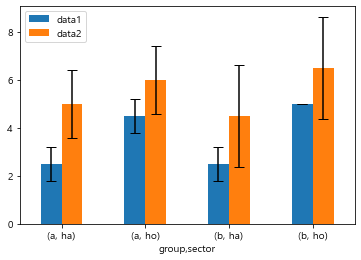

In [22]:
fig, ax = plt.subplots()
avg_df.plot.bar(rot=0, yerr=errors, ax=ax, capsize=5)